**Cybersecurity Intrusion Detection: Exploratory Data Analysis**

We use this report to  presents a data-driven exploration of a cybersecurity intrusion dataset using Python visualizations. The goal is to detect patterns in malicious activity and highlight behavioral and technical indicators of compromise (IoCs).

As the start point we will import required libraries & dataset
We’ll use pandas for data manipulation, matplotlib and seaborn for visualizations.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("/Users/kristina/python/IntrusionData/cybersecurity_intrusion_data.csv")

Let's review **Attack Frequency** to understand the overall distribution of normal vs. attack records in the dataset.

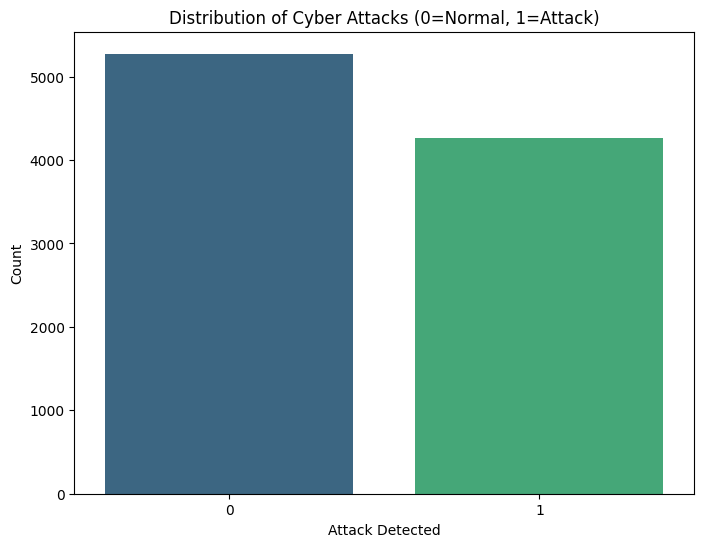

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(x='attack_detected', hue='attack_detected', data=df, palette='viridis', legend=False)
plt.title('Distribution of Cyber Attacks (0=Normal, 1=Attack)')
plt.xlabel('Attack Detected')
plt.ylabel('Count')
plt.show()

Here we have attack_detected = 1 indicates an intrusion or cyber attack.
We can identify a class imbalance, with a higher number of attack events than normal traffic.
Therefore the dataset may be collected from a honeypot or security-focused environment.

As the next step we can review **Protocol Vulnerability Assessment** to identify which network protocol types are more frequently vulnerable for  attacks.

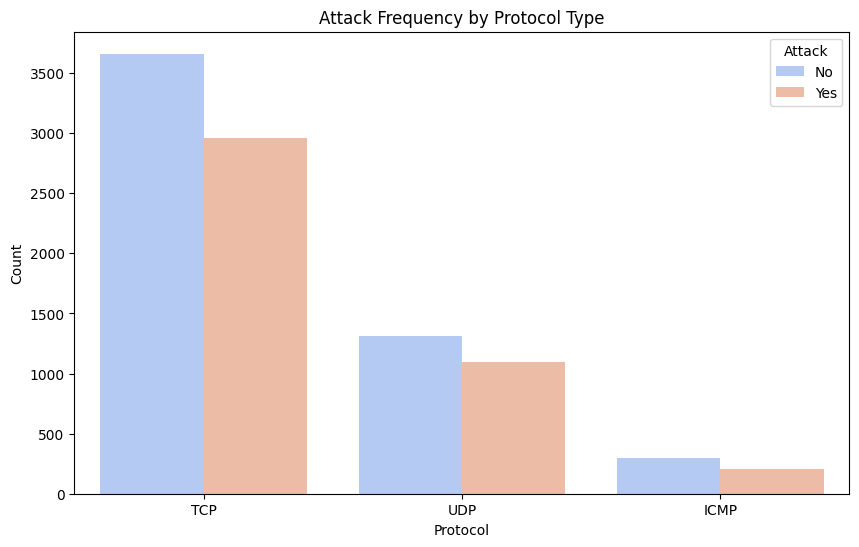

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(x='protocol_type', hue='attack_detected', data=df, palette='coolwarm')
plt.title('Attack Frequency by Protocol Type')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.legend(title='Attack', labels=['No', 'Yes'])
plt.show()

As the results of our observations TCP traffic dominates both attack and non-attack flows, but a disproportionate share of attacks use TCP. UDP and ICMP show lower, but still relevant, levels of activity.

In our next dashboard let's look into  **Network Packet Size Distribution** to investigate if there’s a difference in packet sizes between attack and non-attack traffic

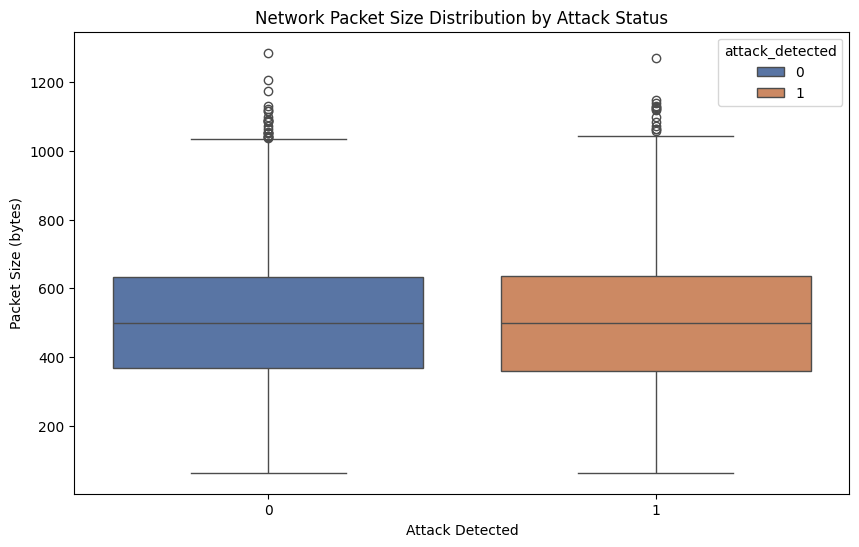

In [37]:
plt.figure(figsize=(10,6))
sns.boxplot(x='attack_detected', y='network_packet_size', hue='attack_detected',  data=df, palette='deep')
plt.title('Network Packet Size Distribution by Attack Status')
plt.xlabel('Attack Detected')
plt.ylabel('Packet Size (bytes)')
plt.show()

On dashboards we see that attack traffic shows higher variance and larger average packet sizes.
Some attack packets are extreme outliers, possibly indicating file transfers or payload-heavy exploits. Anomalously large packets should be flagged or rate-limited in real-time traffic monitoring systems.

**Session Duration Analysis**

Let's have a look and examine if there is any difference in duration of malicious sessions last in comparison to normal sessions.

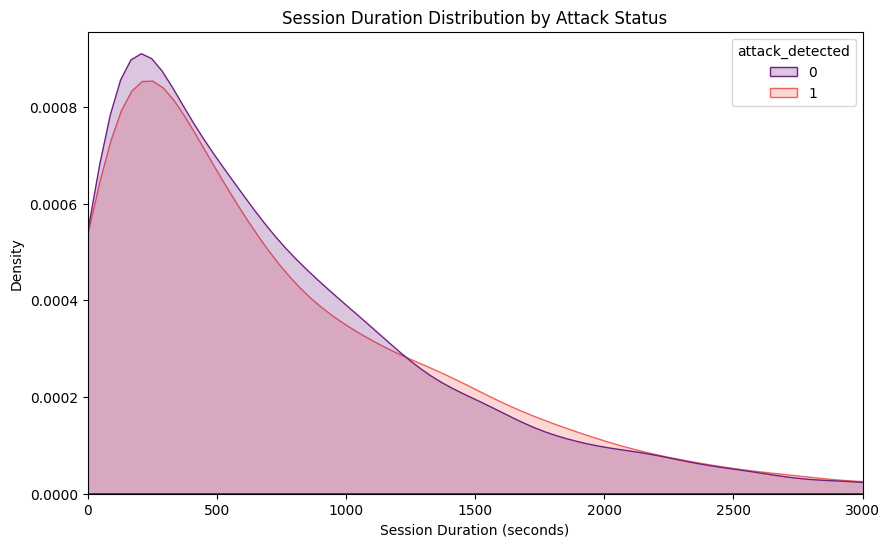

In [16]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='session_duration', hue='attack_detected', 
            fill=True, common_norm=False, palette='magma')
plt.title('Session Duration Distribution by Attack Status')
plt.xlabel('Session Duration (seconds)')
plt.ylabel('Density')
plt.xlim(0, 3000)  # focus on the most relevant range
plt.show()

Session time should be a weighted feature in anomaly detection systems. Alerting thresholds can be set at both extremes.

• Very short: possibly scanning or brute-force attempts.

• Very long: persistent intrusions, data exfiltration, or botnet activity.

**Encryption Type Analysis** 

Let's analyze which encryption methods are used during sessions and their relation to attacks.

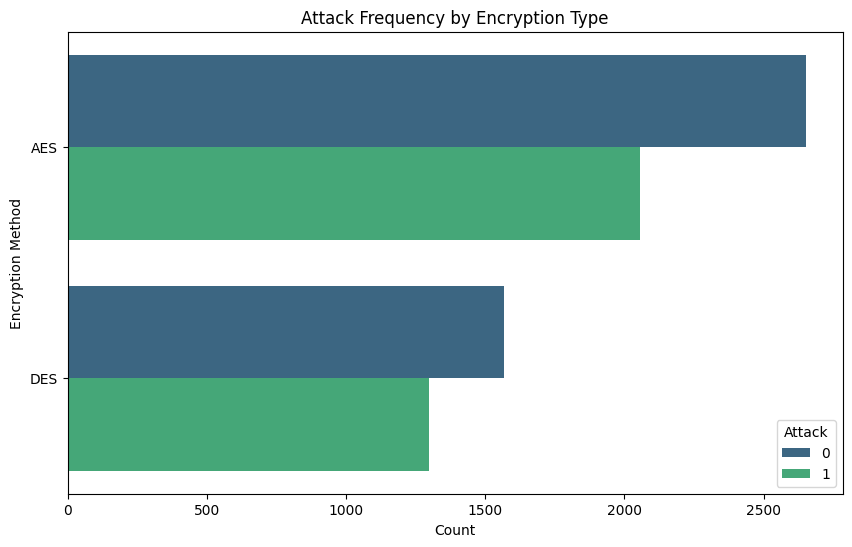

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(y='encryption_used', hue='attack_detected', data=df, 
palette='viridis', order=df['encryption_used'].value_counts().index)
plt.title('Attack Frequency by Encryption Type')
plt.xlabel('Count')
plt.ylabel('Encryption Method')
plt.legend(title='Attack')
plt.show()

At this point we see that DES encryption shows the highest attack rate compare to other. None of (unencrypted sessions) are also widely targeted.

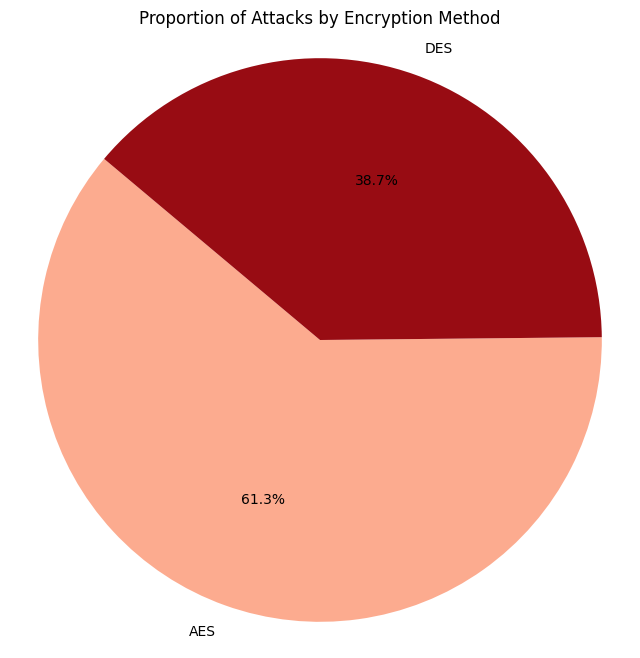

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Filter attack data and count encryption methods
attack_by_encryption = df[df['attack_detected'] == 1]['encryption_used'].value_counts()

# Generate color list from a colormap
colors = plt.cm.Reds(np.linspace(0.3, 0.9, len(attack_by_encryption)))

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(attack_by_encryption, labels=attack_by_encryption.index, 
        autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Proportion of Attacks by Encryption Method')
plt.axis('equal')  # to ensure the pie is circular
plt.show()

**Login Attempts vs IP Reputation**

Let's visualize the behavioral relationship between suspicious login activity and IP trust scores.

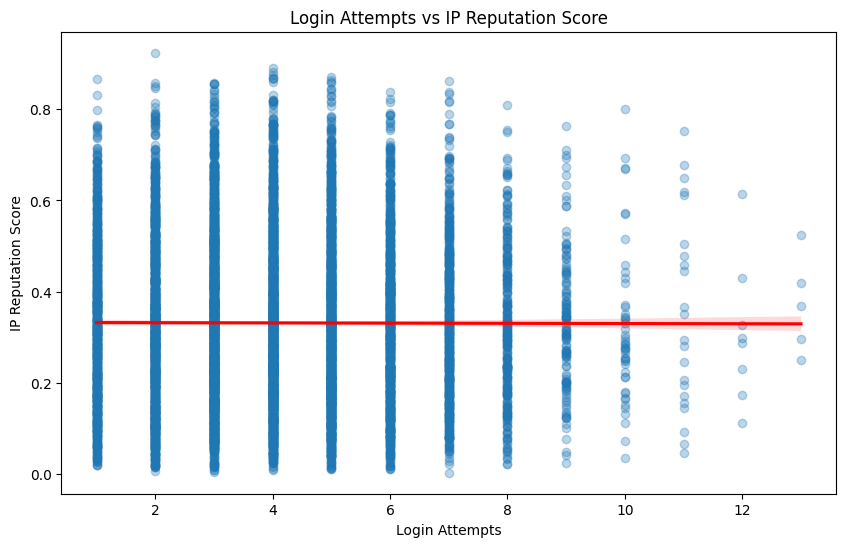

In [35]:
plt.figure(figsize=(10,6))
sns.regplot(x='login_attempts', y='ip_reputation_score', 
data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Login Attempts vs IP Reputation Score')
plt.xlabel('Login Attempts')
plt.ylabel('IP Reputation Score')
plt.show()

Observation: the more login attempts, the lower the IP reputation score. It indicates brute-force attacks, especially from flagged IPs.

**Browser Vulnerability Analysis**
Lastly, let's look into the risk and vulnerability of the browsers have been used. If there is one common trend that attackers target users of specific browsers.


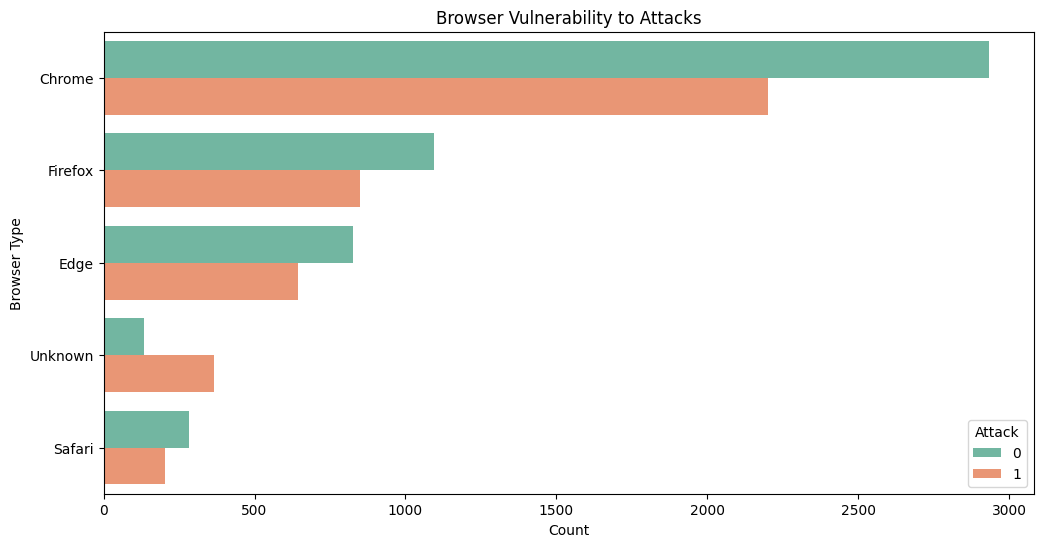

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(y='browser_type', hue='attack_detected', data=df, 
palette='Set2', order=df['browser_type'].value_counts().index)
plt.title('Browser Vulnerability to Attacks')
plt.xlabel('Count')
plt.ylabel('Browser Type')
plt.legend(title='Attack')
plt.show()

We come to conclusion that Chrome is the most frequently involved browser in attacks — likely a result of its global market share. “Unknown” browsers represent custom agents or evasion techniques used by attackers.

🔐 Based on the analysis and visualizations provided as a cybersecurity data analyst we would come to with the few **practical recommendations**:

 • Block or monitor weak encryption (DES) and enforce TLS/SSL for all traffic.

 • Track anomalies in session duration, packet size, and time of day.

 • Incorporate IP reputation and behavioral analytics for access control decisions.

 • Use this EDA to inform feature engineering in intrusion detection models (e.g., Random Forests, XGBoost).
 
 • Limit login attempts and consider MFA implementations, especially for sensitive endpoints.